# *BehavePro Correlation Analysis*
---
Check for simba correlations with simba extracted features

In [1]:
#import everything and set dpi here

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100 #set dpi for viewing figs within the notebook
import scipy.stats as stats
from tqdm import tqdm

## Infotable

In [2]:
directory = r"C:/Users/njana/Desktop/Behavior/Esr1ChronosStim/Day 4/" # include / at end

infofile = directory+"deets.csv"
infotable = pd.read_csv(infofile)

infotable

,name,type,BlindID,MouseID,Type,Day,Trial,stimdur,Total,startf,endf,trunc end,ethofile
0,Tr1n04,standard,M4,BLIND,Chronos,4,1,30,37924,922,37924,0,Hardware-Nov1623_EsrStimD4-Trial 1-Arena 1
1,Tr2n02,standard,M2,BLIND,Chronos,4,2,30,38448,1341,38448,0,Hardware-Nov1623_EsrStimD4-Trial 2-Arena 1
2,Tr3n05,standard,M5,BLIND,Chronos,4,3,30,38160,1129,38160,0,Hardware-Nov1623_EsrStimD4-Trial 3-Arena 1
3,Tr4n03,standard,M3,BLIND,Chronos,4,4,30,38431,1051,38431,0,Hardware-Nov1623_EsrStimD4-Trial 4-Arena 1
4,Tr5n01,standard,M1,BLIND,Chronos,4,5,30,38440,807,38440,0,Hardware-Nov1623_EsrStimD4-Trial 5-Arena 1


In [3]:
ilst = [4]
for i in ilst:
#for i in range(infotable.shape[0]):
    #get the data
    simbarawdata = pd.read_csv(directory+infotable.name[i]+".csv", header = 0)

    behavdata = simbarawdata[["Probability_Aggression","Aggression",	
                            "Probability_Mounting",	"Mounting", 
                            "Probability_Following",	"Following",	
                            "Probability_Dominate",	"Dominate",	
                            "Probability_Social_Contact",	"Social_Contact",	
                            "Probability_Asocial",	"Asocial",	
                            "Probability_Passive",	"Passive",	
                            "Probability_Rest_Move",	"Rest_Move"]]
    
    ethoexportpath = directory+infotable.ethofile[i]+".txt"
    ethoexport = pd.read_csv(ethoexportpath, sep = ';', header = 37)#, encoding='UTF-16le') # so stupid that this works but it does #if issue with UTF-8, use 16le

    input1 = ethoexport.loc[ethoexport["Name"] == "Is input 1 High"]
    input1high = input1.loc[input1["Value"] == 1]
    input1 = input1.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])
    input1high = input1high.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])

    input2 = ethoexport.loc[ethoexport["Name"] == "Is input 2 High"]
    input2high = input2.loc[input2["Value"] == 1]
    input2 = input2.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])
    input2high = input2high.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])
    
    stimtimes = input2high["Recording time"].to_numpy()
    stimtimes = np.asarray(stimtimes, dtype=float)

    truncated = infotable.startf[i]
    fps = 30
    timetrunc = truncated/fps
    stimtimes = stimtimes - timetrunc
    
    stimstartidx = np.around(stimtimes*fps).astype("int")

    stimdur = infotable.stimdur[i] #in seconds
    stimidxdur = stimdur*fps
    stimendidx = stimstartidx + stimidxdur

    stim = np.zeros(behavdata[behavdata.columns[0]].shape[0])

    for j in range(stimstartidx.shape[0]):
        stim[stimstartidx[j]:stimendidx[j]] = 1
    
    BlindID = str(infotable.BlindID[i])
    MouseID = str(infotable.MouseID[i])
    Type = str(infotable.Type[i])        
    day = str(infotable.Day[i])
    trial = str(infotable.Trial[i])
    time = np.arange(0,behavdata[behavdata.columns[0]].shape[0])/fps
    avgtime = np.arange(0,stimdur*3*fps)/fps
    
simbarawdata

,scorer,Ear_left_1_x,Ear_left_1_y,Ear_left_1_p,Ear_right_1_x,Ear_right_1_y,Ear_right_1_p,Nose_1_x,Nose_1_y,Nose_1_p,...,Passive,Probability_Rest_Move,Rest_Move,Probability_Social_Contact,Social_Contact,Probability_Mounting,Mounting,Scaled_movement_M1,Scaled_movement_M2,Scaled_movement_M1_M2
0,0,83.0,257.0,1.0,110.0,277.0,1.000000,120.0,236.0,1.000000,...,0,0.7565,1,0.1485,0,0.0785,0,1.970615,4.299823,3.14
1,1,83.0,258.0,1.0,110.0,278.0,1.000000,120.0,237.0,1.000000,...,0,0.7470,1,0.1705,0,0.0655,0,0.497965,1.122136,0.81
2,2,83.0,258.0,1.0,110.0,278.0,1.000000,119.0,237.0,1.000000,...,0,0.7570,1,0.1870,0,0.0410,0,0.017386,0.038358,0.03
3,3,81.0,259.0,1.0,111.0,278.0,1.000000,119.0,237.0,1.000000,...,0,0.7555,1,0.2270,0,0.0275,0,0.018367,0.051456,0.03
4,4,81.0,259.0,1.0,111.0,278.0,1.000000,120.0,237.0,1.000000,...,0,0.7880,1,0.1940,0,0.0125,0,0.015147,0.024266,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37628,37628,291.0,271.0,1.0,264.0,289.0,0.999979,300.0,316.0,0.999999,...,0,0.8815,1,0.0015,0,0.0000,0,0.014541,0.000035,0.01
37629,37629,291.0,271.0,1.0,264.0,288.0,0.999981,299.0,316.0,0.999999,...,0,0.8700,1,0.0015,0,0.0000,0,0.003573,0.006163,0.00
37630,37630,291.0,272.0,1.0,264.0,290.0,0.999967,301.0,316.0,0.999998,...,0,0.8810,1,0.0020,0,0.0000,0,0.007916,0.005783,0.01
37631,37631,291.0,271.0,1.0,265.0,290.0,0.999825,301.0,317.0,0.999991,...,0,0.8875,1,0.0020,0,0.0000,0,0.004207,0.007843,0.01


In [5]:
simbarawdata.columns

Index(['scorer', 'Ear_left_1_x', 'Ear_left_1_y', 'Ear_left_1_p',
       'Ear_right_1_x', 'Ear_right_1_y', 'Ear_right_1_p', 'Nose_1_x',
       'Nose_1_y', 'Nose_1_p',
       ...
       'Passive', 'Probability_Rest_Move', 'Rest_Move',
       'Probability_Social_Contact', 'Social_Contact', 'Probability_Mounting',
       'Mounting', 'Scaled_movement_M1', 'Scaled_movement_M2',
       'Scaled_movement_M1_M2'],
      dtype='object', length=566)

In [6]:
coeffs = []
for ele in simbarawdata.columns:
    coeffs += [np.corrcoef(simbarawdata[ele],stim)[0][1]]

C:\Users\njana\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\njana\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


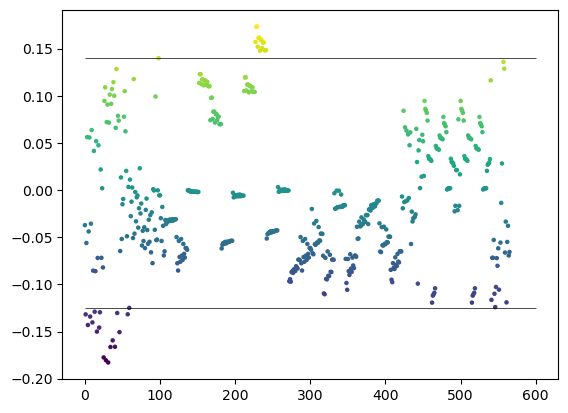

In [7]:
plt.scatter(x = np.arange(0,len(coeffs)), y = coeffs, s = 5, c = coeffs, cmap = 'viridis')
plt.hlines(0.14,0,600, color = 'black', linewidth = 0.5)
plt.hlines(-0.125,0,600, color = 'black', linewidth = 0.5)

In [8]:
simbarawdata.columns[np.array(coeffs) > 0.14]

Index(['Mouse2_smallest_euclid_distances_median_2',
       'Mouse2_smallest_euclid_distances_mean_2',
       'Mouse2_smallest_euclid_distances_sum_2',
       'Mouse2_smallest_euclid_distances_median_5',
       'Mouse2_smallest_euclid_distances_mean_5',
       'Mouse2_smallest_euclid_distances_sum_5',
       'Mouse2_smallest_euclid_distances_median_6',
       'Mouse2_smallest_euclid_distances_mean_6',
       'Mouse2_smallest_euclid_distances_sum_6',
       'Mouse2_smallest_euclid_distances_median_7.5',
       'Mouse2_smallest_euclid_distances_mean_7.5',
       'Mouse2_smallest_euclid_distances_sum_7.5',
       'Mouse2_smallest_euclid_distances_median_15',
       'Mouse2_smallest_euclid_distances_mean_15',
       'Mouse2_smallest_euclid_distances_sum_15'],
      dtype='object')

In [9]:
simbarawdata.columns[np.array(coeffs) < -0.125]

Index(['Ear_left_1_x', 'Ear_right_1_x', 'Nose_1_x', 'Center_1_x',
       'Lat_left_1_x', 'Lat_right_1_x', 'Tail_base_1_x', 'Tail_base_1_y',
       'Ear_left_2_x', 'Ear_right_2_x', 'Nose_2_x', 'Center_2_x',
       'Lat_left_2_x', 'Lat_right_2_x', 'Tail_base_2_x', 'Tail_end_2_x',
       'Mouse_1_Nose_to_centroid'],
      dtype='object')

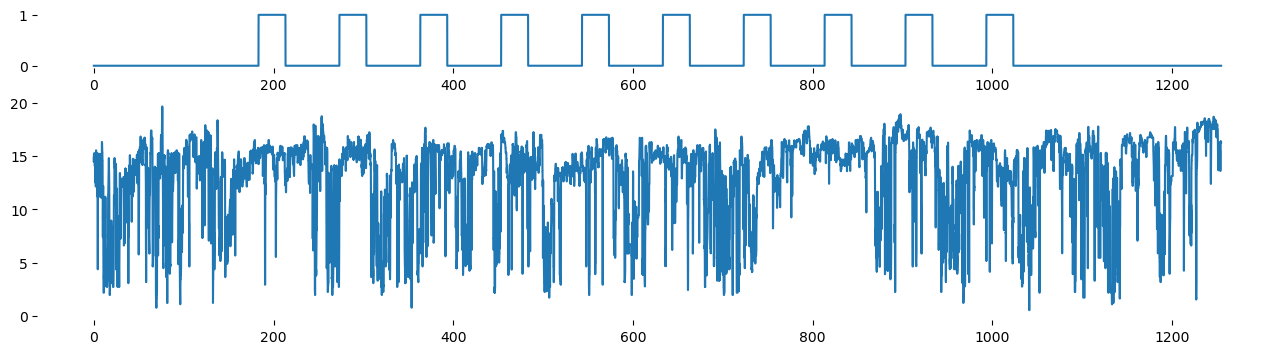

In [10]:
plt.subplots(2,1,gridspec_kw={'height_ratios': [1,4]})
plt.subplot(2,1,1)
plt.plot(time, stim)
plt.subplot(2,1,2)
plt.plot(time, simbarawdata['Mouse2_smallest_euclid_distances_median_2'])#, linewidth = 0.2)
sns.despine(bottom = True, left = True)
plt.gcf().set_size_inches(16,4)

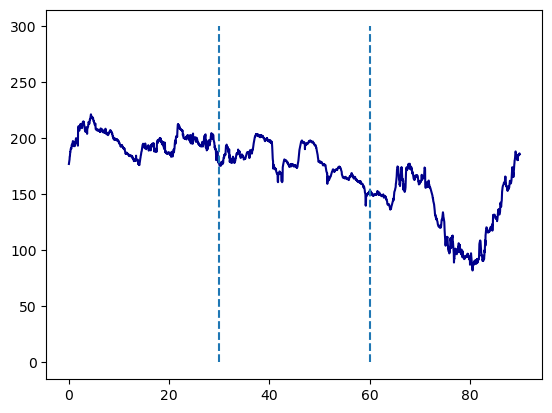

In [11]:
    # calculate the average data
behav = simbarawdata['Centroid_distance'].to_numpy()
window_behav = []
for ele in stimstartidx:
        window_behav += [behav[ele-(stimdur*fps):ele+(stimdur*fps*2)]]
    
window_behav = np.array(window_behav)
avg_behav = np.average(window_behav, axis = 0)
    
# plot the average data
plt.plot(avgtime,avg_behav, color = 'darkblue', alpha = 1)
plt.vlines(30, 0, 300, linestyles = "dashed")
plt.vlines(60, 0, 300, linestyles = "dashed")

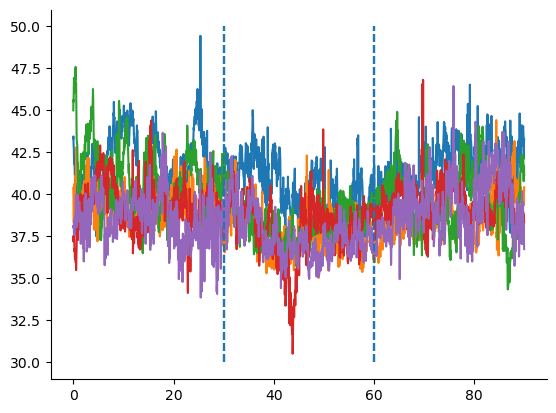

In [18]:
#ilst = [4]
#for i in ilst:
for i in range(infotable.shape[0]):
    #get the data
    simbarawdata = pd.read_csv(directory+infotable.name[i]+".csv", header = 0)

    behavdata = simbarawdata[["Probability_Aggression","Aggression",	
                            "Probability_Mounting",	"Mounting", 
                            "Probability_Following",	"Following",	
                            "Probability_Dominate",	"Dominate",	
                            "Probability_Social_Contact",	"Social_Contact",	
                            "Probability_Asocial",	"Asocial",	
                            "Probability_Passive",	"Passive",	
                            "Probability_Rest_Move",	"Rest_Move"]]
    
    ethoexportpath = directory+infotable.ethofile[i]+".txt"
    ethoexport = pd.read_csv(ethoexportpath, sep = ';', header = 37)#, encoding='UTF-16le') # so stupid that this works but it does #if issue with UTF-8, use 16le

    input1 = ethoexport.loc[ethoexport["Name"] == "Is input 1 High"]
    input1high = input1.loc[input1["Value"] == 1]
    input1 = input1.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])
    input1high = input1high.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])

    input2 = ethoexport.loc[ethoexport["Name"] == "Is input 2 High"]
    input2high = input2.loc[input2["Value"] == 1]
    input2 = input2.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])
    input2high = input2high.drop(columns = ['Trial time', 'Device', 'Command/Signal', 'Unnamed: 6'])
    
    stimtimes = input2high["Recording time"].to_numpy()
    stimtimes = np.asarray(stimtimes, dtype=float)

    truncated = infotable.startf[i]
    fps = 30
    timetrunc = truncated/fps
    stimtimes = stimtimes - timetrunc
    
    stimstartidx = np.around(stimtimes*fps).astype("int")

    stimdur = infotable.stimdur[i] #in seconds
    stimidxdur = stimdur*fps
    stimendidx = stimstartidx + stimidxdur

    stim = np.zeros(behavdata[behavdata.columns[0]].shape[0])

    for j in range(stimstartidx.shape[0]):
        stim[stimstartidx[j]:stimendidx[j]] = 1
    
    BlindID = str(infotable.BlindID[i])
    MouseID = str(infotable.MouseID[i])
    Type = str(infotable.Type[i])        
    day = str(infotable.Day[i])
    trial = str(infotable.Trial[i])
    time = np.arange(0,behavdata[behavdata.columns[0]].shape[0])/fps
    avgtime = np.arange(0,stimdur*3*fps)/fps
    
    behav = simbarawdata['Mouse_1_Nose_to_centroid'].to_numpy()
    window_behav = []
    for ele in stimstartidx:
            window_behav += [behav[ele-(stimdur*fps):ele+(stimdur*fps*2)]]

    window_behav = np.array(window_behav)
    avg_behav = np.average(window_behav, axis = 0)
    
    # plot the average data
    plt.plot(avgtime,avg_behav)
    plt.vlines(30, 30, 50, linestyles = "dashed")
    plt.vlines(60, 30, 50, linestyles = "dashed")
    sns.despine()